In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
csv = pd.read_csv(r"finance\transactions.csv", sep=";")
csv["timestamp"] = pd.to_datetime(csv["Data dell'operazione"] + " " + csv["Ora dell\'operazione"])

csv.sort_values(by="timestamp", inplace=True)
csv.set_index("timestamp", inplace=True)
csv.head()

,Data dell'operazione,Ora dell'operazione,Data di contabilizzazione,Data di valuta,Moneta,Addebito,Accredito,Importo singolo,Saldo,N. di transazione,Descrizione1,Descrizione2,Descrizione3,Note a piè di pagina,Unnamed: 14
timestamp,,,,,,,,,,,,,,,
2023-02-25 00:57:10,2023-02-25,00:57:10,2023-02-27,2023-02-25,CHF,-10.00,NaN,NaN,3384.90,9930557BN3334402,Stösschen AG;8004 Zürich,18917013-0 05/25; Pagamento carta di debito,No di transazioni: 9930557BN3334402,NaN,NaN
2023-02-25 15:03:28,2023-02-25,15:03:28,2023-02-27,2023-02-25,CHF,-25.00,NaN,NaN,3341.40,9930558BN4481456,SBB CFF FFS Ticket Sho;3000 Bern,18917013-0 05/25; Pagamento carta di debito,No di transazioni: 9930558BN4481456,NaN,NaN
2023-02-25 20:55:12,2023-02-25,20:55:12,2023-02-27,2023-02-25,CHF,-18.50,NaN,NaN,3366.40,9930557BN4329571,Nelson Pub;8001 Zürich,18917013-0 05/25; Pagamento carta di debito,No di transazioni: 9930557BN4329571,NaN,NaN
2023-02-26 00:05:39,2023-02-26,00:05:39,2023-02-28,2023-02-26,CHF,-16.00,NaN,NaN,3325.40,9930559BN5033871,Raygrodski;8003 Zuerich,18917013-0 05/25; Pagamento carta di debito,No di transazioni: 9930559BN5033871,NaN,NaN
2023-02-27 20:04:41,2023-02-27,20:04:41,2023-02-28,2023-02-27,CHF,-25.85,NaN,NaN,3299.55,9930559BN6027645,Migros M Rigiplatz;8006 Zürich,18917013-0 05/25; Pagamento carta di debito,No di transazioni: 9930559BN6027645,NaN,NaN


In [35]:
import gensim.downloader
from scipy.linalg import norm

model = gensim.downloader.load("glove-wiki-gigaword-50")

In [31]:
csv[["grocery", "transportation", "fun", "administration", "other"]] = None

In [32]:
csv.head()

,Data dell'operazione,Ora dell'operazione,Data di contabilizzazione,Data di valuta,Moneta,Addebito,Accredito,Importo singolo,Saldo,N. di transazione,...,Descrizione2,Descrizione3,Note a piè di pagina,Unnamed: 14,"(grocery, transportation, fun, administration, other)",grocery,transportation,fun,administration,other
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-02-25 00:57:10,2023-02-25,00:57:10,2023-02-27,2023-02-25,CHF,-10.00,NaN,NaN,3384.90,9930557BN3334402,...,18917013-0 05/25; Pagamento carta di debito,No di transazioni: 9930557BN3334402,NaN,NaN,None,None,None,None,None,None
2023-02-25 15:03:28,2023-02-25,15:03:28,2023-02-27,2023-02-25,CHF,-25.00,NaN,NaN,3341.40,9930558BN4481456,...,18917013-0 05/25; Pagamento carta di debito,No di transazioni: 9930558BN4481456,NaN,NaN,None,None,None,None,None,None
2023-02-25 20:55:12,2023-02-25,20:55:12,2023-02-27,2023-02-25,CHF,-18.50,NaN,NaN,3366.40,9930557BN4329571,...,18917013-0 05/25; Pagamento carta di debito,No di transazioni: 9930557BN4329571,NaN,NaN,None,None,None,None,None,None
2023-02-26 00:05:39,2023-02-26,00:05:39,2023-02-28,2023-02-26,CHF,-16.00,NaN,NaN,3325.40,9930559BN5033871,...,18917013-0 05/25; Pagamento carta di debito,No di transazioni: 9930559BN5033871,NaN,NaN,None,None,None,None,None,None
2023-02-27 20:04:41,2023-02-27,20:04:41,2023-02-28,2023-02-27,CHF,-25.85,NaN,NaN,3299.55,9930559BN6027645,...,18917013-0 05/25; Pagamento carta di debito,No di transazioni: 9930559BN6027645,NaN,NaN,None,None,None,None,None,None


In [48]:
from scipy.special import softmax

categories = ["grocery", "transportation", "fun", "administration", "other"]
for idx, line in csv.iterrows():
    word = line["Descrizione1"].split(" ")[0].split("-")[0].lower()
    if word == "uzh":
        sym = [1, 0, 0, 0, 0]
    elif word not in model:
        sym = [0, 0, 0, 0, 1]
    else:
        sym = [np.dot(model[word], model[category]) for category in categories[:-1]]
        sym = softmax([*sym, -np.inf])
    csv.loc[idx, categories] = sym
    csv.loc[idx, "category"] = categories[np.argmax(sym)]


In [49]:
csv.head()

,Data dell'operazione,Ora dell'operazione,Data di contabilizzazione,Data di valuta,Moneta,Addebito,Accredito,Importo singolo,Saldo,N. di transazione,...,Descrizione3,Note a piè di pagina,Unnamed: 14,"(grocery, transportation, fun, administration, other)",grocery,transportation,fun,administration,other,category
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-02-25 00:57:10,2023-02-25,00:57:10,2023-02-27,2023-02-25,CHF,-10.00,NaN,NaN,3384.90,9930557BN3334402,...,No di transazioni: 9930557BN3334402,NaN,NaN,None,0,0,0,0,1,other
2023-02-25 15:03:28,2023-02-25,15:03:28,2023-02-27,2023-02-25,CHF,-25.00,NaN,NaN,3341.40,9930558BN4481456,...,No di transazioni: 9930558BN4481456,NaN,NaN,None,0.000803,0.989833,0.000002,0.009362,0.0,transportation
2023-02-25 20:55:12,2023-02-25,20:55:12,2023-02-27,2023-02-25,CHF,-18.50,NaN,NaN,3366.40,9930557BN4329571,...,No di transazioni: 9930557BN4329571,NaN,NaN,None,0.000104,0.0319,0.057746,0.91025,0.0,administration
2023-02-26 00:05:39,2023-02-26,00:05:39,2023-02-28,2023-02-26,CHF,-16.00,NaN,NaN,3325.40,9930559BN5033871,...,No di transazioni: 9930559BN5033871,NaN,NaN,None,0,0,0,0,1,other
2023-02-27 20:04:41,2023-02-27,20:04:41,2023-02-28,2023-02-27,CHF,-25.85,NaN,NaN,3299.55,9930559BN6027645,...,No di transazioni: 9930559BN6027645,NaN,NaN,None,0.999934,0.000065,0.000001,0.0,0.0,grocery


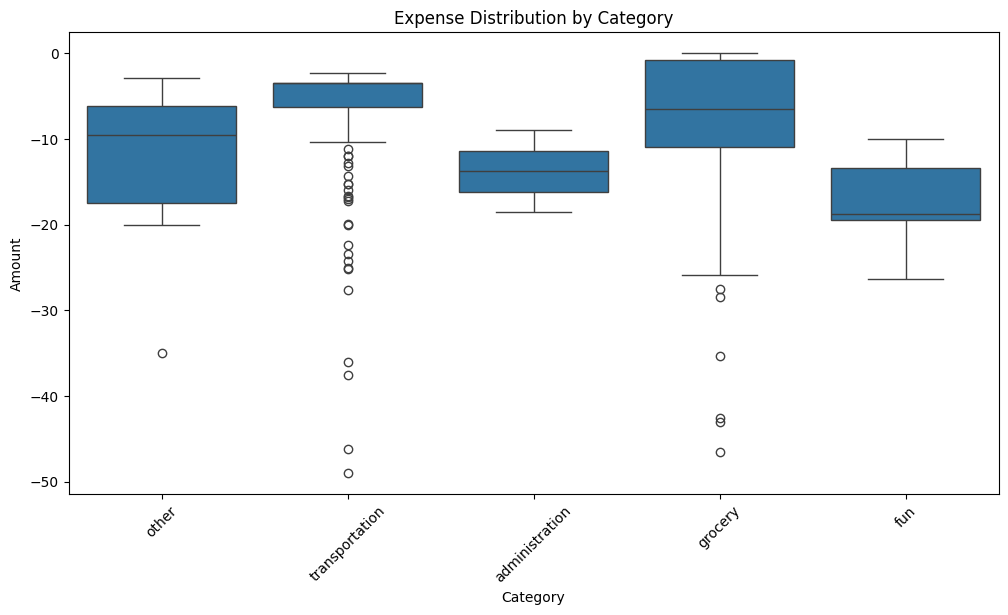

In [60]:
df = csv[csv["Addebito"] > -50]
df = df[["Addebito", "category"]].dropna(axis="rows")

plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='Addebito', data=df)
plt.title('Expense Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

In [4]:
[csv["Descrizione1"].str.contains("SBB")]

[timestamp
 2023-02-25 00:57:10    False
 2023-02-25 15:03:28     True
 2023-02-25 20:55:12    False
 2023-02-26 00:05:39    False
 2023-02-27 20:04:41    False
                        ...  
 NaT                    False
 NaT                    False
 NaT                    False
 NaT                    False
 NaT                    False
 Name: Descrizione1, Length: 377, dtype: bool]

In [3]:
sbb_op = csv[csv["Descrizione1"].str.contains("SBB")]

In [4]:
sbb_op.loc["2023-05-01": "2024-06-01", "Addebito"].sum()

-948.3

In [5]:
sbb_op["cumsum"] = sbb_op["Addebito"].cumsum()

C:\ProgramData\ANACONDA3\Scripts\ipykernel_9928\2596450337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbb_op["cumsum"] = sbb_op["Addebito"].cumsum()


In [8]:
sbb_op = sbb_op[["cumsum", "Addebito"]]

In [9]:
sbb_op.dropna(axis="rows", inplace=True)

C:\ProgramData\ANACONDA3\Scripts\ipykernel_9928\1097680868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbb_op.dropna(axis="rows", inplace=True)


<Axes: xlabel='Addebito', ylabel='Count'>

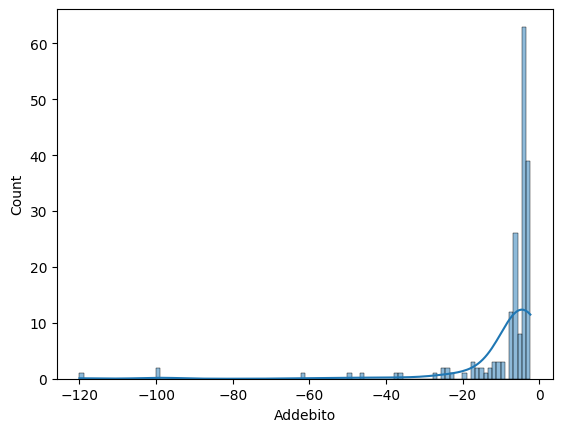

In [14]:
import seaborn as sns
sns.histplot(data=sbb_op, x=sbb_op["Addebito"], kde=True)

ConversionError: Failed to convert value(s) to axis units: array(['2023-02-25T15:03:28.000000000', '2023-04-08T10:26:42.000000000',
       '2023-04-08T10:40:30.000000000', '2023-04-08T10:45:44.000000000',
       '2023-04-08T16:44:03.000000000', '2023-04-16T14:29:15.000000000',
       '2023-04-18T14:34:41.000000000', '2023-04-19T18:37:34.000000000',
       '2023-04-19T18:38:30.000000000', '2023-05-10T19:11:54.000000000',
       '2023-05-16T21:10:11.000000000', '2023-05-16T23:26:46.000000000',
       '2023-05-16T23:29:08.000000000', '2023-06-16T06:09:01.000000000',
       '2023-06-19T22:14:36.000000000', '2023-06-26T17:09:32.000000000',
       '2023-06-27T06:19:37.000000000', '2023-06-27T16:30:17.000000000',
       '2023-07-01T21:50:22.000000000', '2023-07-02T19:45:51.000000000',
       '2023-07-04T07:33:10.000000000', '2023-07-06T15:12:25.000000000',
       '2023-07-07T19:40:49.000000000', '2023-07-10T08:36:48.000000000',
       '2023-07-10T11:57:55.000000000', '2023-08-24T11:00:25.000000000',
       '2023-08-24T18:36:09.000000000', '2023-08-25T12:29:22.000000000',
       '2023-09-18T15:12:46.000000000', '2023-09-25T10:14:57.000000000',
       '2023-09-26T07:37:26.000000000', '2023-09-26T07:39:10.000000000',
       '2023-09-27T09:39:41.000000000', '2023-09-29T21:14:57.000000000',
       '2023-09-30T20:56:03.000000000', '2023-10-01T12:46:46.000000000',
       '2023-10-02T06:38:12.000000000', '2023-10-03T10:09:58.000000000',
       '2023-10-04T15:17:26.000000000', '2023-10-05T06:42:19.000000000',
       '2023-10-09T16:40:45.000000000', '2023-10-10T08:43:04.000000000',
       '2023-10-15T15:55:57.000000000', '2023-10-27T06:12:44.000000000',
       '2023-10-30T13:50:35.000000000', '2023-11-01T14:23:35.000000000',
       '2023-11-03T06:38:48.000000000', '2023-11-04T06:18:42.000000000',
       '2023-11-06T21:29:54.000000000', '2023-11-06T21:31:57.000000000',
       '2023-11-09T06:40:39.000000000', '2023-11-09T17:26:19.000000000',
       '2023-11-11T09:56:23.000000000', '2023-11-11T16:06:33.000000000',
       '2023-11-11T23:18:47.000000000', '2023-11-16T09:02:02.000000000',
       '2023-11-20T13:33:36.000000000', '2023-11-21T10:52:23.000000000',
       '2023-11-22T11:13:30.000000000', '2023-11-23T10:23:51.000000000',
       '2023-11-25T11:05:41.000000000', '2023-11-26T10:55:58.000000000',
       '2023-11-27T09:14:18.000000000', '2023-12-04T15:19:54.000000000',
       '2023-12-07T09:05:49.000000000', '2023-12-08T11:03:17.000000000',
       '2023-12-09T09:17:49.000000000', '2023-12-10T09:08:20.000000000',
       '2023-12-12T10:29:24.000000000', '2023-12-14T09:13:34.000000000',
       '2023-12-16T09:41:14.000000000', '2023-12-17T09:45:06.000000000',
       '2023-12-19T09:01:57.000000000', '2023-12-20T09:57:58.000000000',
       '2024-01-10T09:25:57.000000000', '2024-01-11T09:09:28.000000000',
       '2024-01-12T09:06:23.000000000', '2024-01-16T09:11:21.000000000',
       '2024-01-18T13:27:02.000000000', '2024-01-20T09:03:31.000000000',
       '2024-01-22T10:16:59.000000000', '2024-01-22T11:12:09.000000000',
       '2024-01-23T09:10:50.000000000', '2024-01-25T09:01:40.000000000',
       '2024-01-26T10:57:57.000000000', '2024-01-26T23:00:16.000000000',
       '2024-01-27T10:41:45.000000000', '2024-01-29T09:01:01.000000000',
       '2024-01-30T09:47:35.000000000', '2024-01-31T15:04:48.000000000',
       '2024-02-02T09:12:55.000000000', '2024-02-03T10:00:35.000000000',
       '2024-02-06T09:20:53.000000000', '2024-02-08T09:57:48.000000000',
       '2024-02-08T20:08:59.000000000', '2024-02-09T09:32:08.000000000',
       '2024-02-10T10:08:54.000000000', '2024-02-12T09:41:04.000000000',
       '2024-02-14T09:56:52.000000000', '2024-02-17T09:57:20.000000000',
       '2024-02-20T09:40:52.000000000', '2024-02-21T10:04:38.000000000',
       '2024-02-23T09:52:31.000000000', '2024-02-24T10:18:27.000000000',
       '2024-02-25T09:59:05.000000000', '2024-03-01T09:49:01.000000000',
       '2024-03-02T16:21:35.000000000', '2024-03-05T09:48:51.000000000',
       '2024-03-06T09:16:07.000000000', '2024-03-11T09:05:25.000000000',
       '2024-03-12T09:44:50.000000000', '2024-03-13T10:11:41.000000000',
       '2024-03-14T10:02:19.000000000', '2024-03-16T09:49:46.000000000',
       '2024-03-19T09:02:54.000000000', '2024-03-20T09:55:51.000000000',
       '2024-03-22T09:24:19.000000000', '2024-03-22T11:04:25.000000000',
       '2024-03-23T10:03:06.000000000', '2024-04-08T09:06:14.000000000',
       '2024-04-09T11:43:08.000000000', '2024-04-12T09:14:42.000000000',
       '2024-04-16T09:02:37.000000000', '2024-04-19T10:23:23.000000000',
       '2024-04-20T09:14:09.000000000', '2024-04-22T09:38:02.000000000',
       '2024-04-22T10:27:36.000000000', '2024-04-24T10:17:56.000000000',
       '2024-04-25T09:53:24.000000000', '2024-04-26T09:47:21.000000000',
       '2024-05-01T10:06:40.000000000', '2024-05-03T09:19:47.000000000',
       '2024-05-04T10:10:35.000000000', '2024-05-07T09:16:06.000000000',
       '2024-05-07T10:42:54.000000000', '2024-05-09T09:54:50.000000000',
       '2024-05-10T09:10:51.000000000', '2024-05-14T10:06:32.000000000',
       '2024-05-15T10:06:15.000000000', '2024-05-16T09:39:43.000000000',
       '2024-05-17T09:41:25.000000000', '2024-05-18T09:46:13.000000000',
       '2024-05-21T09:03:18.000000000', '2024-05-22T09:42:07.000000000',
       '2024-05-23T10:08:53.000000000', '2024-05-24T10:27:03.000000000',
       '2024-05-30T10:12:12.000000000', '2024-05-31T10:15:30.000000000',
       '2024-06-01T09:12:26.000000000', '2024-06-02T09:39:13.000000000',
       '2024-06-04T10:18:57.000000000', '2024-06-05T10:14:37.000000000',
       '2024-06-07T10:29:51.000000000', '2024-06-08T06:59:24.000000000',
       '2024-06-12T10:46:42.000000000', '2024-06-13T09:59:29.000000000',
       '2024-06-14T10:08:44.000000000', '2024-06-22T09:32:55.000000000',
       '2024-06-30T09:54:58.000000000', '2024-07-07T23:14:39.000000000',
       '2024-07-08T00:12:31.000000000', '2024-07-10T10:10:48.000000000',
       '2024-07-16T09:30:20.000000000', '2024-07-25T09:25:16.000000000',
       '2024-07-26T09:42:19.000000000', '2024-08-02T10:55:11.000000000',
       '2024-08-11T10:04:51.000000000', '2024-08-12T09:11:25.000000000',
       '2024-08-13T09:27:34.000000000', '2024-08-14T09:58:00.000000000',
       '2024-08-15T10:00:32.000000000', '2024-08-19T09:43:00.000000000',
       '2024-08-20T11:20:00.000000000', '2024-08-24T09:24:34.000000000',
       '2024-08-28T18:48:35.000000000', '2024-08-30T10:24:47.000000000',
       '2024-09-13T21:24:59.000000000', '2024-09-18T10:45:34.000000000',
       '2024-09-25T10:18:18.000000000', '2024-09-28T09:37:03.000000000',
       '2024-09-28T17:30:26.000000000', '2024-10-05T09:16:49.000000000'],
      dtype='datetime64[ns]')

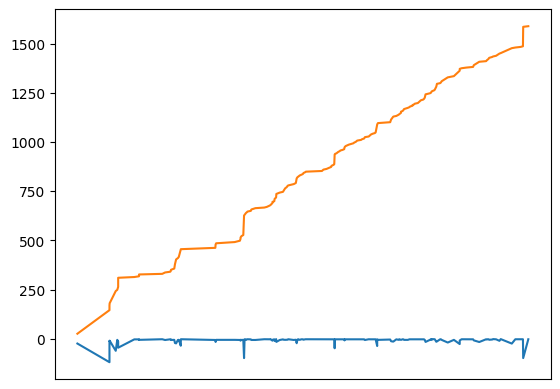

In [16]:
plt.plot(sbb_op.index, sbb_op["Addebito"], -sbb_op["cumsum"])
# sns.barplot(sbb_op, y="Addebito")

C:\ProgramData\ANACONDA3\Scripts\ipykernel_9928\2504635066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbb_op_filtered["cumsum"] = sbb_op_filtered["Addebito"].cumsum().dropna(axis="rows")


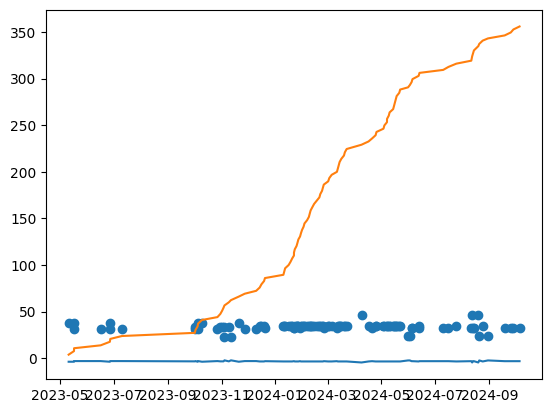

In [24]:
sbb_op_filtered = sbb_op[sbb_op["Addebito"] > -5]
sbb_op_filtered["cumsum"] = sbb_op_filtered["Addebito"].cumsum().dropna(axis="rows")

plt.plot(sbb_op_filtered.index, sbb_op_filtered["Addebito"], -sbb_op_filtered["cumsum"])
plt.scatter(sbb_op_filtered.index, -10*sbb_op_filtered["Addebito"])

In [ ]:
sbb_op